In [1]:
PYDEVD_DISABLE_FILE_VALIDATION=1

In [2]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT
import gym

from gym.wrappers.gray_scale_observation import GrayScaleObservation
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

import cv2
import numpy as np
import matplotlib.pyplot as plt

import warnings

# Suppress all warnings (not recommended for production code)
warnings.filterwarnings("ignore")

In [3]:
# Walk around for seed error env.reset()
JoypadSpace.reset = lambda self, **kwargs: self.env.reset(**kwargs)

In [4]:
# Create the base environment
env = gym.make('SuperMarioBros-v0', apply_api_compatibility=True, render_mode="rgb_array")
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# env = GrayScaleObservation(env, keep_dim=True)
# Wrap env in a DummyVecEnv
env = DummyVecEnv([lambda: env])
# Stack the frames
# env = VecFrameStack(env, n_stack=4)

In [5]:
done = True

env.reset()

for _idx in range(800):
    obs, reward, done, info = env.step([1])

    if done:
        state = env.reset()
    
env.close()

(1, 240, 256, 3)
(240, 256, 3)


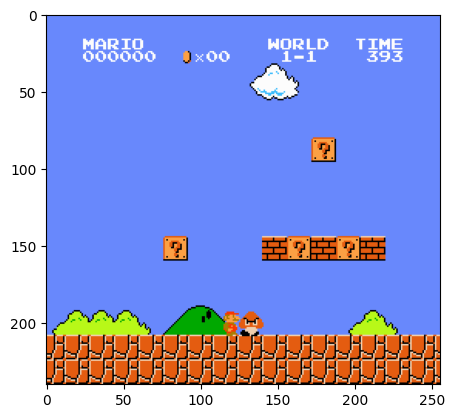

In [6]:
print(obs.shape)

obs_img = obs[0]
print(obs_img.shape)

plt.imshow(obs_img)

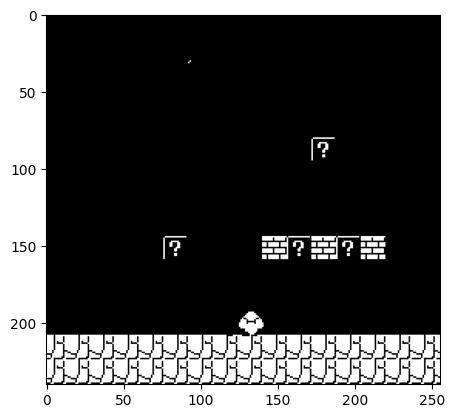

In [87]:
# select enemy's belly
low1 = np.array([238, 206, 174])
high1 = np.array([242, 210, 178])

# select enemy's head
low2 = np.array([226, 90, 15])
high2 = np.array([230, 94, 19])

mask1 = cv2.inRange(obs_img, low1, high1)
mask2 = cv2.inRange(obs_img, low2, high2)

# Combine the masks
mask = cv2.bitwise_or(mask1, mask2)

plt.imshow(mask, cmap='gray')

In [103]:
contours, _ = cv2.findContours(obs_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

canvas = np.copy(obs_img)
# Initialize an empty image to draw the results on
result_image = np.zeros_like(canvas)

# Iterate through the detected contours and draw bounding rectangles
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result_image, (x, y), (x + w, y + h), 255, 2)

# Display the original canvas and the result
plt.imshow(canvas, cmap='gray')

error: OpenCV(4.8.0) /Users/xperience/GHA-OpenCV-Python/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [ ]:
import pyautogui
import PIL

Top left: (25, 24)
Bottom right: (61, 66)


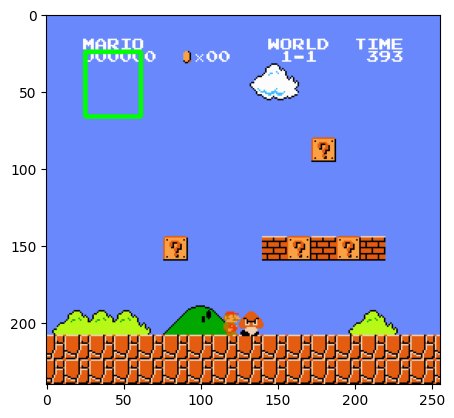

In [9]:
import cv2
import numpy as np

# image = cv2.imread("pLarge.ng")
template = cv2.imread("templates/enemy.png")

result = cv2.matchTemplate(obs_img, template, cv2.TM_CCOEFF_NORMED)

# Find the location of the best match
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
h, w = template.shape[:-1]
bottom_right = (top_left[0] + w, top_left[1] + h)

# Draw a bounding box around the matched region
# matched_img = cv2.cvtColor(obs_img.copy(), cv2.COLOR_BGR2RGB)
cv2.rectangle(obs_img, top_left, bottom_right, (0, 255, 0), 2)  # Green rectangle

# Print the position of the best match
print("Top left:", top_left)
print("Bottom right:", bottom_right)

# Display the matched image with bounding box using plt.imshow
plt.imshow(obs_img)
plt.show()